In [68]:
import numpy as np

def ridge_regression(X, y, lam): 
    I = np.identity(X.shape[1])
    weight = np.dot(np.linalg.inv(np.dot(X.T, X) + lam * I), np.dot(X.T, y))
    return weight


In [69]:
from scipy.io import loadmat

data = loadmat('diabetes.mat')

X_train = data['x_train']
y_train = data['y_train']

X_test = data['x_test']
y_test = data['y_test']


In [96]:
def mse(actual, pred):
    return np.sum((actual - pred) ** 2) / len(actual)

errors_train = []
errors_test = []
lambdas_lst = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]

for i in lambdas_lst:
    
    weight = ridge_regression(X_train, y_train, i)
    
    pred_train = np.dot(X_train, weight)
    pred_test = np.dot(X_test, weight)

    mse_train = mse(y_train, pred_train)
    mse_test = mse(y_test, pred_test)

    errors_train.append(mse_train)
    errors_test.append(mse_test)

    print("λ = "+ str(i) + " | Training Error: " + str(mse_train) + " | Testing Error: " + str(mse_test))


λ = 1e-05 | Training Error: 19695.354823964473 | Testing Error: 76911.07208671166
λ = 0.0001 | Training Error: 20060.11613873794 | Testing Error: 57531.76027004421
λ = 0.001 | Training Error: 20384.664250733887 | Testing Error: 49060.59804050336
λ = 0.01 | Training Error: 20918.86518165216 | Testing Error: 44405.139402623994
λ = 0.1 | Training Error: 22075.715668745594 | Testing Error: 36994.6967266464
λ = 1 | Training Error: 24730.739328369953 | Testing Error: 30517.773939737766
λ = 10 | Training Error: 27165.12612819299 | Testing Error: 30057.30349989966


In [97]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

best = float('inf')
best_mse = float('inf')

for i in lambdas_lst:
    
    mse_lst = []
    
    for train_i, val_i in kf.split(X_train):
        
        X_train_fold, X_val_fold = X_train[train_i], X_train[val_i]
        y_train_fold, y_val_fold = y_train[train_i], y_train[val_i]

        w = ridge_regression(X_train_fold, y_train_fold, i)
        y_pred = np.dot(X_val_fold, w)

        mse_lst.append(compute_mse(y_val_fold, y_pred))
    
    avg = np.mean(mse_lst)
    
    if avg < best_mse:
        
        best_mse = avg
        best = i

print(i, ", Average Validation Error:", avg)
print("Best λ:", best)


10 , Average Validation Error: 27952.20072243912
Best λ: 10


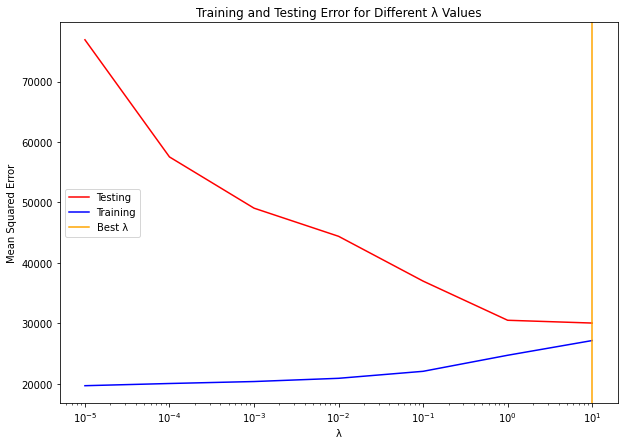

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(lambdas_lst, errors_test, label = 'Testing', color = 'red')
plt.plot(lambdas_lst, errors_train, label = 'Training', color = 'blue')
plt.axvline(best, color = 'orange', label = 'Best λ')
plt.xscale('log')
plt.ylabel('Mean Squared Error')
plt.xlabel('λ')
plt.title('Training and Testing Error for Different λ Values')
plt.legend()

